# BioE 80 - Dancing Droplets

In this module, we'll explore a simplified droplets model using Python.


## Two Organizing Principles

From your reading (see [Vapour-mediated sensing and motility in two-component droplets](https://www-nature-com.stanford.idm.oclc.org/articles/nature14272)), you will have identified two main principles of interactions between droplets:

1. Long-range Interactions: Droplets are attracted to each other
2. Short-range Interactions: Droplets of lower surface tension will "chase" droplets of higher surface tension

We can create a simple simulation that will allow you to play with these concepts. To help build intuition on how to create this model and how you may think about creating other models, let's walk through the process of building our model step-by-step.

## 1.0 - Creating a Box and Adding Droplets

The first thing we'll need to do is generate a "box" for the droplets to interact in and add our first droplet. To do so, we will be using the animation framework from `matplotlib`. While not interactive, this is a good way of quickly testing your underlying code.

In [1]:
# Import Statements
import numpy as np # To help manage data
import matplotlib.pyplot as plt # Plotting Framework
from matplotlib import animation # Animation Framework
from IPython.display import HTML # Interactive viewing
plt.rcParams["animation.html"] = "jshtml" # Interactive viewing

### 1.1 - Creating the Box

To create the box, we'll be using matplotlib. To make this simple, we'll define the box where the bottom left corner is (0,0) and the top right corner is (100,100). Note, we will resuse and copy this code throughout the program.

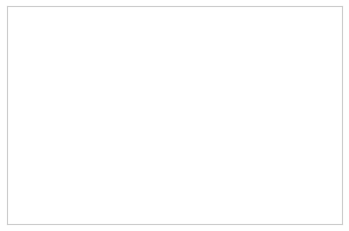

In [2]:
# Figure Creation
fig, ax = plt.subplots() # Create Figure
ax.axis([0, 100, 0 ,100]) # Create box limits

# Hide grid lines and axis labels to make it look more like a box :)
ax.axes.yaxis.set_visible(False)
ax.axes.xaxis.set_visible(False)

### 1.2 - Defining a "Droplet"

To help make things easy, let's create a "droplet" class. If you haven't worked with classes before in Python or other programming languages, don't worry. Classes are just a way of easily organizing methods and properties in a single, callable object. We'll be resuing and updating this definition throughout this module as we add functionality to our module.

In [3]:
class droplet_basic():
    # This is a "constructor",
    def __init__(self):
        self.x = np.random.randint(0, 100) # X coordinate of the droplet
        self.y = np.random.randint(0,100) # Y coordinate of the droplet

### 1.3 - Adding Droplets to our Box

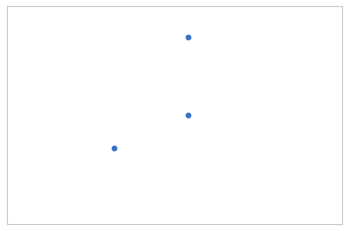

In [4]:
# Figure Creation
fig, ax = plt.subplots() # Create Figure
ax.axis([0, 100, 0 ,100]) # Create box limits

# Hide grid lines and axis labels to make it look more like a box :)
ax.axes.yaxis.set_visible(False)
ax.axes.xaxis.set_visible(False)

# Let's Make Three Droplets
num_droplets = 3
droplets = []
for i in range(num_droplets):
    droplets.append(droplet_basic())

# Grab x coordinates and y coordinates for plotting
droplets_x = [droplet.x for droplet in droplets]
droplets_y = [droplet.y for droplet in droplets]


# Add our Droplets
scat = ax.scatter(droplets_x, droplets_y)

We've now created a bounding box for our model and have the basics for adding droplets to that box. The next step in building our model is to model and animate movement.

## 2.0 - Droplet Movement and Animation

To model movement, let's redefine our droplet class, this time with two additional velocity properties. Then, we'll start animating their movements using `matplotlib`.

### 2.1 - Modeling Velocity and Movement

To model movement, we'll have to make three modifications to the code that we've already written:

1. Add velocity properties to our droplet class
2. Add a class method to "move" the droplet
3. Create a helper function to update all of our droplets

In [5]:
class droplet_basic_animated():
    def __init__(self):
        """ Constructor function
        """
        self.x = np.random.randint(30, 70) # X coordinate of the droplet, put in middle to see movement
        self.y = np.random.randint(30,70) # Y coordinate of the droplet, put in model to see movement
        self.vel_x = np.random.uniform(0,0.5) # X Velocity
        self.vel_y = np.random.uniform(0,0.5) # Y Velocity
        
    def move(self):
        """ Update coordinate based on the velocity
        """
        self.x += self.vel_x
        self.y += self.vel_y

In [6]:
def move_droplets_basic_animated(droplets):
    """ Updates all droplet coordinates using their move method
    """
    for droplet in droplets:
        droplet.move()

### 2.2 - Animating Movement

Now that we have droplets and functions to model movement, we'll then start using the animation library from matplotlib to visualize these changes. What we are doing in this piece of code is evaluating the position and velocity over a series of time steps, creating the plots of the droplets using the same code from above, and then stringing them together into a video.

In [7]:
def droplet_model_basic_animated(num_droplets, model_name):
    # Initial Figure Creation
    fig, ax = plt.subplots()
    ax.axis([0, 100, 0 ,100])
    ax.set_title(model_name)
    ax.axes.yaxis.set_visible(False)
    ax.axes.xaxis.set_visible(False)
    colors = ['C' + str(i) for i in range(num_droplets)]

    # Initial Droplet Creation
    droplets = []
    np.random.seed(0) # Make sure random initailization in consistent!
    
    for counter in range(num_droplets):
        droplets.append(droplet_basic_animated())

    droplets_x = [droplet.x for droplet in droplets]
    droplets_y = [droplet.y for droplet in droplets]

    scat = ax.scatter(droplets_x, droplets_y, c=colors)

    def animate(i):
        move_droplets_basic_animated(droplets)
        droplets_x = [droplet.x for droplet in droplets]
        droplets_y = [droplet.y for droplet in droplets]
        scat.set_offsets(np.c_[droplets_x, droplets_y])
        return scat,

    anim = animation.FuncAnimation(fig, animate, frames=300, interval=20, blit=True)
    plt.close()
    return(anim)

In [8]:
anim = droplet_model_basic_animated(2, '2.2 - Basic Animated Movement')
anim

### 2.3 - Keeping the Droplets in the Box

You may notice that in the previous model implementation, our droplets are running out of the box! We can fix this problem by assuming that the velocity switches direction if the droplet attempts to move beyond the bounding edges of the box.

In [ ]:
class droplet_constrained_animated():
    def __init__(self):
        """ Constructor function
        """
        self.x = np.random.randint(30, 70) # X coordinate of the droplet
        self.y = np.random.randint(30,70) # Y coordinate of the droplet
        self.vel_x = np.random.uniform(0,0.5)
        self.vel_y = np.random.uniform(0,0.5)
    def move(self):
        """ Update coordinate based on the velocity
        """
        
        # Create a temporary coordinate storage to help with special cases
        temp_x = self.x + self.vel_x
        temp_y = self.y + self.vel_y
        self.bounding_box_update(temp_x, temp_y)
        
    def bounding_box_update(self, temp_x, temp_y):
        if temp_x <= 0 or temp_x >= 100:
            self.vel_x = self.vel_x * -1
            self.x += self.vel_x
        else:
            self.x = temp_x
            
        if temp_y <= 0 or temp_y >= 100:
            self.vel_y = self.vel_y * -1
            self.y += self.vel_y
        else:
            self.y = temp_y

In [ ]:
def droplet_model_constrained_animated(num_droplets, model_name):
    # Initial Figure Creation
    fig, ax = plt.subplots()
    ax.axis([0, 100, 0 ,100])
    ax.set_title(model_name)
    ax.axes.yaxis.set_visible(False)
    ax.axes.xaxis.set_visible(False)
    colors = ['C' + str(i) for i in range(num_droplets)]

    # Initial Droplet Creation
    droplets = []
    np.random.seed(0) # Make sure random initailization in consistent!
    
    for counter in range(num_droplets):
        droplets.append(droplet_constrained_animated())

    droplets_x = [droplet.x for droplet in droplets]
    droplets_y = [droplet.y for droplet in droplets]

    scat = ax.scatter(droplets_x, droplets_y, c=colors)

    def animate(i):
        move_droplets_basic_animated(droplets)
        droplets_x = [droplet.x for droplet in droplets]
        droplets_y = [droplet.y for droplet in droplets]
        scat.set_offsets(np.c_[droplets_x, droplets_y])
        return scat,

    anim = animation.FuncAnimation(fig, animate, frames=300, interval=20, blit=True)
    plt.close()
    return(anim)

In [ ]:
# Run Model and Animate
anim = droplet_model_constrained_animated(4,'2.3 - Constrained Movement')
anim

We've now have created the basic foundations for our final model:

1. We have a "box" where the model will be run in
2. We have droplet objects that can move with a given velocity
3. We have an animation workflow to visualize the model over time

Now, let's start extending this model to incorporate the two basic rules of dancing droplets!

## 3.0 - Principle 1: Droplets Attract at Long Distances

The first principle we'll implement is the observation that droplets attract each other at long distances. While the physics behind this is complicated, we'll use a much more basic model that will allow you to play with the parameters.

We'll be implementing two different items:

1. Attraction Force
2. Drag Force

### Attraction Force

While the underlying physics behind long-range attraction is highly complex, we'll use a much simpler model based on gravitational attraction:

$$F_{att} = a\frac{m_1 m_2}{d^2}$$

Where:
- $a$ = Force Constant
- $m_1$ and $m_2$ = Mass of droplets
- $d$ = Distance between droplets

The total attractive force for each droplet is the sum of the attractive forces with each other droplet.

### Drag Force

As mentioned in the paper, each droplet experiences a drag force defined as:

$$F_{drag} = cv$$

Where
- $c$ = Drag force constant
- $v$ = Velocity

### Putting Force Together

To calculate the final force, we sum all component forces together:

$$F = F_{att} + F_{drag}$$

To make this model simpler, we will make some additional assumptions:
1. All droplets have $m = 1$, yielding $F = \frac{a}{d^2}$


2. Each evaluation frame covers 1 second, yielding the update rule for velocity $v_{t+1} = v_t + F$


### 3.1 - Implementing Force Calculations

With the given definitions for the forces for each droplet, we can add them to our model.

In [ ]:
class droplet_force():
    def __init__(self, droplet_id):
        """ Constructor function
        """
        self.x = np.random.randint(0, 50) # X coordinate of the droplet
        self.y = np.random.randint(0, 50) # Y coordinate of the droplet
        self.vel_x = np.random.uniform(-.2,0.2)
        self.vel_y = np.random.uniform(0,0.2)
        self.id = droplet_id # Required for force calculations
        
    def move(self, droplets):
        """ Update coordinate based on the velocity
        """
        
        # Update Velocity Based on Froce
        self.update_velocity(droplets)
        
        # Create a temporary coordinate storage to help with special cases
        temp_x = self.x + self.vel_x
        temp_y = self.y + self.vel_y
        self.bounding_box_update(temp_x, temp_y)
        
    def bounding_box_update(self, temp_x, temp_y):
        """ Properly updates velocity to keep within our box
        """
        
        # Address left and right bounaries
        if temp_x <= 0.5 or temp_x >= 49.5:
            self.vel_x = self.vel_x * -1
            self.x += self.vel_x
        else:
            self.x = temp_x
            
        # Address top and bottom boundaries
        if temp_y <= 0.5 or temp_y >= 49.5:
            self.vel_y = self.vel_y * -1
            self.y += self.vel_y
        else:
            self.y = temp_y
    
    def force_calc(self, droplets):
        """ Calculates the x and y component of net force, similar to gravitational force
        """
        force_x = 0 # Force in the x direction
        force_y = 0 # Force in the y direction
        max_force = 0.2 # Threshold to keep model from exploding
        drag_const = 0.02
        force_const = 0.1
        
        # Calculate Net Attractive Forces
        for droplet in droplets:
            # Need to make sure we're not using the same droplet in the calculation
            # Also need to make sure they aren't in the same spot (division by 0)
            if droplet.id != self.id and (self.x != droplet.x and self.y != droplet.y):
                
                # Calculates Distances
                dist_x = droplet.x - self.x
                dist_y = droplet.y - self.y
                dist_tot = np.linalg.norm([dist_x, dist_y])
                
                # Calculates unit vectors
                dir_x, dir_y = (dist_x, dist_y) / dist_tot
                
                # Calculates the force along each axis component
                force_x += min(max_force, force_const / abs(dist_tot)**2) * dir_x 
                force_y += min(max_force, force_const / abs(dist_tot)**2) * dir_y
        
        # Calculate Drag Force
        force_x += -(drag_const * self.vel_x)
        force_y += -(drag_const * self.vel_y)
                
        return (force_x, force_y)
    
    def update_velocity(self, droplets):
        """ Updates velocity based on the force calculation.
        """
        # We use F=MA => A = F/M, assume M = 1 and each frame is a single second => dv/dt = a = f
        force_x, force_y = self.force_calc(droplets)
        
        self.vel_x += force_x
        self.vel_y += force_y
        

In [ ]:
def move_droplets_force(droplets):
    """ Updates all droplet coordinates using their move method
    """
    for droplet in droplets:
        droplet.move(droplets)

In [ ]:
def droplet_model_force(num_droplets, model_name):
    # Initial Figure Creation
    fig, ax = plt.subplots()
    ax.axis([0, 50, 0 ,50])
    ax.set_title(model_name)
    ax.axes.yaxis.set_visible(False)
    ax.axes.xaxis.set_visible(False)
    colors = ['C' + str(i) for i in range(num_droplets)]

    # Initial Droplet Creation
    droplets = []
    np.random.seed(0) # Make sure random initailization in consistent!
    
    for counter in range(num_droplets):
        droplets.append(droplet_force(counter))

    droplets_x = [droplet.x for droplet in droplets]
    droplets_y = [droplet.y for droplet in droplets]

    scat = ax.scatter(droplets_x, droplets_y, c=colors)

    def animate(i):
        move_droplets_force(droplets)
        droplets_x = [droplet.x for droplet in droplets]
        droplets_y = [droplet.y for droplet in droplets]
        scat.set_offsets(np.c_[droplets_x, droplets_y])
        return scat,

    anim = animation.FuncAnimation(fig, animate, frames=1200, interval=20, blit=True)
    plt.close()
    return(anim)

In [ ]:
# Run Model and Animate
anim = droplet_model_force(4,'3.1 - Droplets with Force Calculations')
anim

We've now created a model with an attractive force! As exepcted, this model breaks down when the droplets intersect with each other and cause a consistently strong force! If we were looking to model hard spheres, we could address this special case by creating a model system that approximates elastic collisions (you may have seen this in a physics class). However, we know that droplets in close proximity will start chasing each other depending on their surface tension (Principle 2), so we'll now add this principle to our model to address this case.

## 4.0 - Principle 2: Droplet Chasing

As mentioned above, we now have computational model of droplets that have an attractive force between them, covering Principle 1 in our system. We will now implement Principle 2: droplets of higher surface tension are "chased" by droplets with lower surface tension.

In [ ]:
class droplet_chase():
    def __init__(self, droplet_id, surface_tension, max_force, drag_const, force_const, chase_speed):
        """ Constructor function
        """
        self.x = np.random.randint(15, 35) # X coordinate of the droplet
        self.y = np.random.randint(15, 35) # Y coordinate of the droplet
        self.vel_x = np.random.uniform(-0.2,0.2) # X Velocity
        self.vel_y = np.random.uniform(0.2,0.2) # Y Velocity
        self.id = droplet_id # Required for force calculations
        self.st = surface_tension
        
        ### --- Model Parameters --- ###
        self.max_force = max_force # Controls the maximum force a droplet can exerperience
        self.drag_const = drag_const # Controls how much drag a droplet can experience
        self.force_const = force_const # Controls how strong the attractive force is
        self.chase_speed = chase_speed # Controls how fast droplets chase each other
        ### ------------------------ ###
        
    def move(self, droplets):
        """ Update coordinate based on the velocity
        """
        
        # Update Velocity Based on Froce
        self.update_velocity(droplets)
        
        # Create a temporary coordinate storage to help with special cases
        temp_x = self.x + self.vel_x
        temp_y = self.y + self.vel_y
        self.bounding_box_update(temp_x, temp_y)
        
    def bounding_box_update(self, temp_x, temp_y):
        """ Properly updates velocity to keep within our box
        """
        
        # Address left and right bounaries
        if temp_x <= 0.5 or temp_x >= 49.5: #Add padding for marker size
            self.vel_x = self.vel_x * -1
            self.x += self.vel_x
        else:
            self.x = temp_x
        
        # Address top and bottom boundaries
        if temp_y <= 0.5 or temp_y >= 49.5:
            self.vel_y = self.vel_y * -1
            self.y += self.vel_y
        else:
            self.y = temp_y
    
    def force_calc(self, droplets):
        """ Calculates the x and y component of net force, similar to gravitational force
        """
        
        # Holds forces for summation
        force_x = 0 # Force in the x direction
        force_y = 0 # Force in the y direction
        
        # Required to prevent division by 0!
        eps = 10**(-6) # 
        
        # Calculate Net Attractive Forces
        for droplet in droplets:
            
            # Need to make sure we're not using the same droplet in the calculation
            # Also need to make sure they aren't in the same spot (division by 0)
            if droplet.id != self.id and (abs(self.x - droplet.x) >= 1 and abs(self.y - droplet.y) >= 1):
                
                # Calculate distances and directions to calculate the force
                dist_x, dist_y, dir_x, dir_y, dist_tot = calc_dist_dir(self, droplet)
                
                # Calculate the attractive force between the droplets
                force_x += min(self.max_force, self.force_const / (abs(dist_tot + eps)**2)) * dir_x 
                force_y += min(self.max_force, self.force_const / (abs(dist_tot + eps)**2)) * dir_y
        
        # Calcualte Drag Force
        force_x += -(self.drag_const * self.vel_x)
        force_y += -(self.drag_const * self.vel_y)
                
        return (force_x, force_y)
    
    def update_velocity(self, droplets):
        """ Updates velocity of the droplets
        """
        
        # We use F=MA => A = F/M, assume M = 1 and each frame is a single second => dv/dt = a = f
        collision = self.check_collision(droplets)
        
        # Use force calculations if not in chase Mode
        if not collision:
            force_x, force_y = self.force_calc(droplets)
            self.vel_x += force_x
            self.vel_y += force_y

    def check_collision(self, droplets):
        """ Check for collision to initiate chase
        """
        
        collision_status = False
        
        for droplet in droplets:
            
            # Check for collision to initiate chase
            if droplet.id != self.id and (abs(self.x - droplet.x) < 1 and abs(self.y - droplet.y) < 1):
                collision_status = True
                
                if self.st < droplet.st: # Start the chase - If higher
                    dist_x, dist_y, dir_x, dir_y, dist_tot = calc_dist_dir(self, droplet)
                    
                    self.vel_x = dir_x * self.chase_speed
                    self.vel_y = dir_y * self.chase_speed
                    droplet.vel_x = dir_x * self.chase_speed
                    droplet.vel_y = dir_y * self.chase_speed
        return(collision_status)
    
def move_droplets_chase(droplets):
    """ Updates all droplet coordinates using their move method
    """
    for droplet in droplets:
        droplet.move(droplets)
        
def calc_dist_dir(curr_droplet, other_droplet):
    """ Calculates distances and unit vector for direction
    """
    
    ## Calculate distances
    dist_x = other_droplet.x - curr_droplet.x
    dist_y = other_droplet.y - curr_droplet.y
    dist_tot = np.linalg.norm([dist_x, dist_y])
    
    # Calculate unit vector
    dir_x, dir_y = (dist_x, dist_y) / dist_tot
    
    return(dist_x, dist_y, dir_x, dir_y, dist_tot)

In [ ]:
def droplet_model_chase(num_droplets, seed, max_force, drag_const, force_const, chase_speed):
    
    ### --- Model Definition --- ###
    model_name = '3.1 - Chasing Droplets'
    
    # Initial Figure Creation
    fig, ax = plt.subplots()
    ax.axis([0, 50, 0, 50])
    ax.set_title(model_name)
    ax.axes.yaxis.set_visible(False)
    ax.axes.xaxis.set_visible(False)
    
    # Details for droplet colors in plotting
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    color_dict = {'b': 'blue',
                  'g': 'green',
                  'r': 'red',
                  'c': 'cyan',
                  'm': 'magenta',
                  'y': 'yellow',
                  'k': 'black'}
    act_colors = colors[:num_droplets]

    # Initial Droplet Creation
    droplets = []
    np.random.seed(seed) # Make sure random initailization in consistent!
    
    for counter in range(num_droplets):
        droplets.append(droplet_chase(droplet_id = counter,
                                      surface_tension = counter * 100 + 10,
                                      max_force = max_force,
                                      drag_const = drag_const,
                                      force_const = force_const,
                                      chase_speed = chase_speed))
    # Initialize Plot
    droplets_x = [droplet.x for droplet in droplets]
    droplets_y = [droplet.y for droplet in droplets]
    scat = ax.scatter(droplets_x, droplets_y, c=act_colors)

    # Animation Function 
    def animate(i):
        move_droplets_chase(droplets)
        droplets_x = [droplet.x for droplet in droplets]
        droplets_y = [droplet.y for droplet in droplets]
        scat.set_offsets(np.c_[droplets_x, droplets_y])
        return scat,

    anim = animation.FuncAnimation(fig, animate, frames=600, interval=20, blit=True)
    plt.close()
    
    # Legend for the plot
    for index in range(num_droplets):
        print(str(color_dict[act_colors[index]]) + ": " + str(droplets[index].st))
        
    return(anim)

In [ ]:
# Run and animate the model
anim = droplet_model_chase(num_droplets=4,
                           seed=2,
                           max_force=1.1,
                           drag_const = 0.01,
                           force_const = 0.1,
                           chase_speed = .2)
anim

As you can see, we finally have a basic computational model for our dancing droplets! Because this is a computational model, we can continue playing with the different model parameters to explore their effects. You can try different model parameters by modifying the code below:

In [ ]:
# Run Model and Animate
anim = droplet_model_chase(num_droplets=6,
                           seed=2,
                           max_force=1.1,
                           drag_const = 0.01,
                           force_const = 0.1,
                           chase_speed = .2)
anim

Like in any model building exercise, you may notice that there are now new edge cases that may need to be addressed. For example, in this new model, we've added an edge case where there is odd behavior when droplets are chased to the edges of our model box. This is because the limitations we placed on them for chasing and force behavior are overridden by the chasing behavior. There are many ways we could address this through different modeling assumptions. If you would like, you can try building out an assumption at the end of module.

## Closing

In this module, you 